In [1]:
import numpy as np
from nozzle import Params, Nozzle, Spectral, Boundary
import matplotlib.pyplot as plt
import os

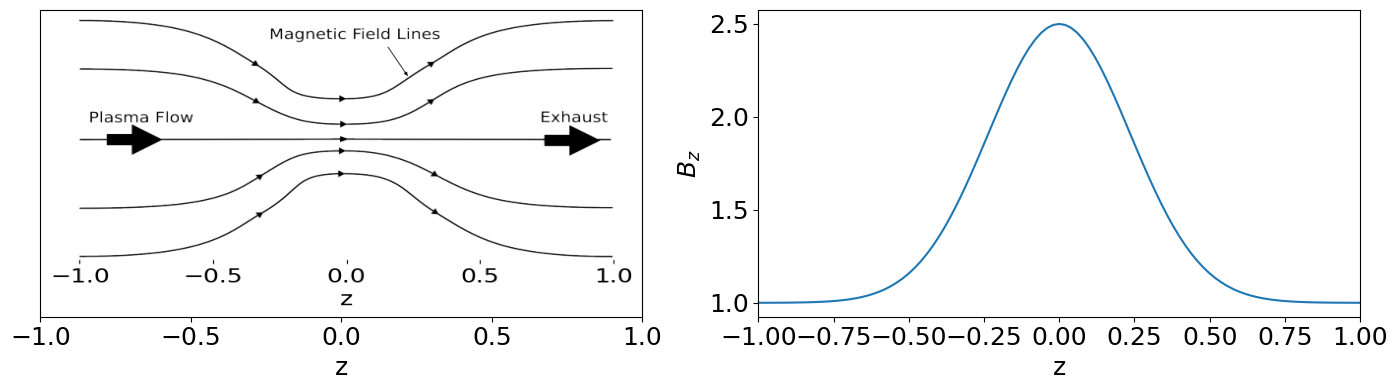

In [4]:
# magnetic field
spectral = Spectral(101, "symmetric", "FD")
params = Params(Mm=0.5, constant_v=False)
B0 = params.B0
R = params.R
Bm = params.Bm
Delta = params.Delta 
x = spectral.x
B = B0*(1+R*np.exp(-(x/Delta)**2))
fig, ax = plt.subplots(1,2,figsize=(14,4))
img = plt.imread("thesis/img/magnetic-nozzle.png")
ax[1].plot(x,B)
ax[1].set_xlim([-1,1])
ax[1].set_xlabel("z")
ax[1].set_ylabel("$B_z$")
ax[0].imshow(img, aspect="auto", extent=[-1,1,0,2])
ax[0].set_xticks(ax[1].get_xticks())
ax[0].set_yticks([])
ax[0].set_xlabel("z")
fig.tight_layout()

Text(0, 0.5, '$B_z$')

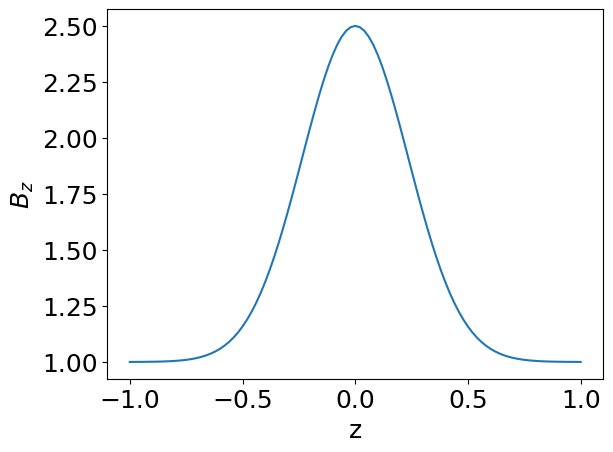

In [6]:
plt.plot(x,B)
plt.xlabel("z")
plt.ylabel("$B_z$")

Text(0.5, 1.0, 'Equilibrium velocity profile')

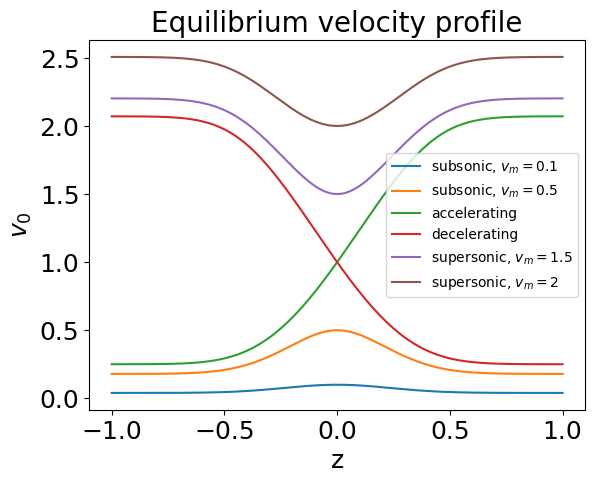

In [2]:
params_list = [
    Params(Mm=0.1, constant_v=False),
    Params(Mm=0.5, constant_v=False),
    Params(Mm=1, accelerating=True),
    Params(Mm=1, accelerating=False),
    Params(Mm=1.5, constant_v=False),
    Params(Mm=2, constant_v=False),
]
x = np.linspace(-1,1,1001)
for params in params_list:
    nozzle = Nozzle(params, x)
    if params.accelerating == True:
        label = "accelerating"
    elif params.accelerating == False:
        label = "decelerating"
    elif params.Mm < 1:
        label = f"subsonic, $v_m={params.Mm}$"
    elif params.Mm > 1:
        label = f"supersonic, $v_m={params.Mm}$"
    plt.plot(x, nozzle.v0, label=label)
plt.legend(fontsize="medium")
plt.xlabel("z")
plt.ylabel("$v_0$")
plt.title("Equilibrium velocity profile")

analytical v_0'(z): 2.3237900077244498
numerical v_0''(z): (1.79998984670965+0j)
numerical v_0'''(z): (-16.731318537495103+0j)


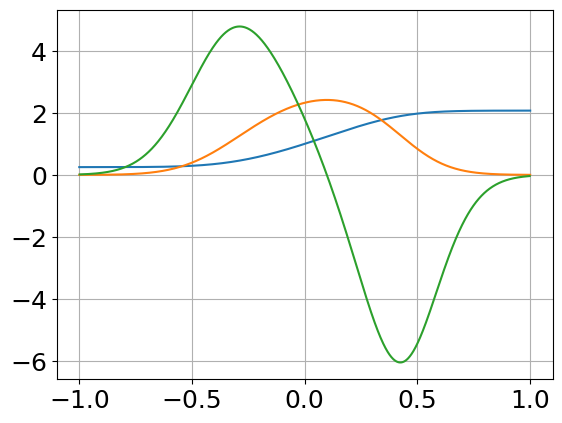

In [4]:
N = 1001
params = Params(Mm=1.0, accelerating=True)
spectral = Spectral(N, "symmetric", "FD")
x = spectral.x
D1 = spectral.D1
D2 = spectral.D2
nozzle = Nozzle(params, x)
v0 = nozzle.v0
print("analytical v_0'(z):", np.sqrt(params.R/(1+params.R)/params.Delta**2))
print("numerical v_0''(z):", (D2@v0)[500])
print("numerical v_0'''(z):", (D1@(D2@v0))[500])

plt.plot(x, v0)
plt.plot(x, (D1@v0).real)
plt.plot(x[1:-1], (D2@v0).real[1:-1])
plt.grid()

# constant velocity

Text(0.5, 1.0, '$M_m=1.0$, accelerating')

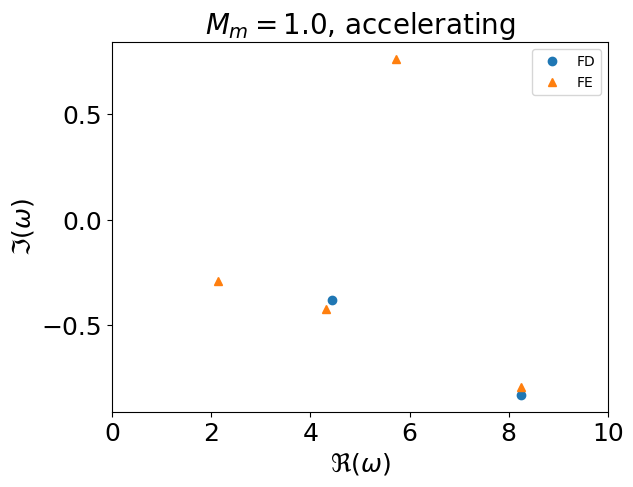

In [62]:
Mm = 1.0
constant_v = False
accelerating = True
boundary = Boundary.FIXED_OPEN
marker = {
    "FD": "o",
    "FE": "^",
    "SE": "s"
}
methods = ["FD", "FE"]

data_dir = os.path.join("data", boundary.value)
if constant_v:
    data_dir = os.path.join(data_dir, "constant_v")
elif (Mm > 1):
    data_dir = os.path.join(data_dir, "supersonic_v")
elif (Mm < 1):
    data_dir = os.path.join(data_dir, "subsonic_v")
elif (Mm == 1):
    if accelerating:
        data_dir = os.path.join(data_dir, "accelerating_v")
    else:
        data_dir = os.path.join(data_dir, "decelerating_v")
datas = os.listdir(data_dir)

for method in methods:
    file = next(filter(lambda name: (method in name) and (f"Mm={Mm}" in name), datas))
    data = np.load(os.path.join(data_dir,file))
    x, omega, V = data["x"], data["omega"], data["V"]
    plt.plot(omega.real, omega.imag, marker[method], label=method)
plt.xlim([0,10])

# omega = np.arange(1,6)*np.pi/2*np.abs(1-Mm**2)
# plt.plot(omega.real, omega.imag, 'x', label="Exact")

# omega = (Mm**2-1)*(2*np.arange(1,6)*np.pi - 1j*np.log((Mm-1)/(Mm+1)+0j))/4
# plt.plot(omega.real, omega.imag, 'x', label="Exact")

plt.legend(fontsize="medium", loc="best")
plt.xlabel("$\Re(\omega)$")
plt.ylabel("$\Im(\omega)$")
title = f"$M_m={Mm}$"
if (np.isclose(Mm, 1.0)): 
    title += ", accelerating" if accelerating else ", decelerating"
elif constant_v:
    title = f"$v_0={Mm}$"
plt.title(title)

In [40]:
Mm = 0.5
# exact = np.arange(1,10)*np.pi/2*np.abs(1-Mm**2)
exact = (Mm**2-1)*(2*np.arange(0,6)*np.pi - 1j*np.log((Mm-1)/(Mm+1)+0j))/4
data_dir = os.path.join("data", Boundary.FIXED_OPEN.value, "constant_v")
# omega = np.load(os.path.join(data_dir,f"FD_Mm={Mm}_N=501.npz"))["omega"] # FD
omega = np.load(os.path.join(data_dir,f"FE_Mm={Mm}_N=101.npz"))["omega"] # FE_Bspline
# omega = np.load(os.path.join(data_dir,f"SE_Mm={Mm}_N=50.npz"))["omega"] # SE_Sine

exact.real = np.abs(exact.real)
size = min(exact.size, omega.size)
# rel_err_real = np.abs(omega.real[:size]-exact.real[:size])/exact.real[:size]
# rel_err_imag = np.abs(omega.imag[:size]-exact.imag[:size])/exact.imag[:size]
# print("relative error real:", rel_err_real)
# print("relative error imag:", rel_err_imag)
np.abs(omega[:size]-exact[:size])/np.abs(exact[:size])

array([8.08987571e-05, 2.00700827e-04, 2.98094002e-04, 6.59640796e-04,
       1.82059521e-03])

# B-Spline

In [2]:
from scipy.interpolate import BSpline

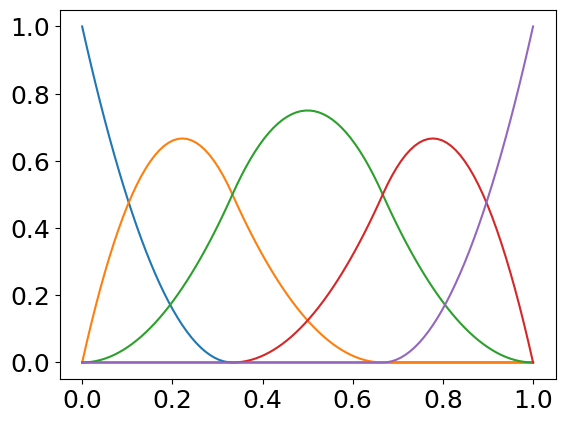

In [84]:
x = np.linspace(0,1,100)
k = 2
t = np.concatenate([np.zeros(k), np.linspace(0,1,4) ,np.ones(k)])
c = np.zeros(t.size-k-1)
c[-1] = 1
for _ in range(t.size-k-1):
    c = np.roll(c,1)
    spl = BSpline(t,c,k)
    plt.plot(x,spl(x))

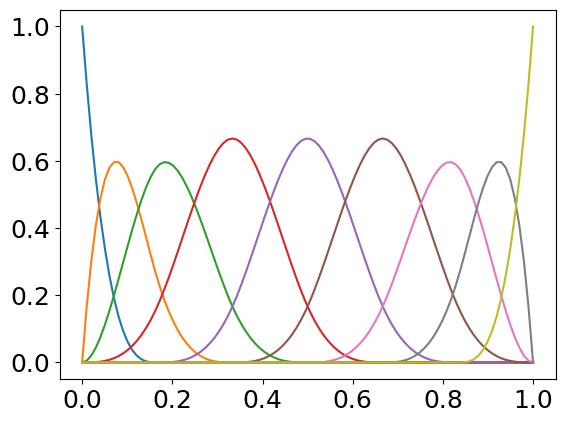

In [82]:
x = np.linspace(0,1,100)
k = 3
t = np.concatenate([np.zeros(k), np.linspace(0,1,7) ,np.ones(k)])
c = np.zeros(t.size-k-1)
c[-1] = 1
for _ in range(t.size-k-1):
    c = np.roll(c,1)
    spl = BSpline(t,c,k)
    plt.plot(x,spl(x))

## Spectral pollution

In [87]:
import numpy as np
from nozzle import Spectral, Params, Nozzle, Boundary
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Chebyshev vs Finite Difference')

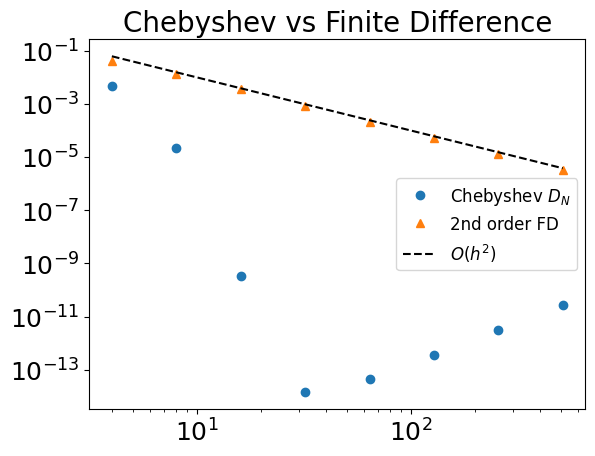

In [3]:
N_range = 2**np.arange(2,10)
h_range = 1/N_range
err_chebyshev = []
err_finite_difference = []
for N in N_range:
    chebyshev = Spectral(int(N), "symmetric", "CH")
    y = np.log(2+np.sin(chebyshev.x))
    yp_approx = chebyshev.D1@y
    yp_exact = np.cos(chebyshev.x) / (2+np.sin(chebyshev.x))
    err_arr = (yp_approx - yp_exact)[1:-1]
    err_chebyshev.append(np.linalg.norm(err_arr, np.inf))

    finite_difference = Spectral(int(N), "symmetric", "FD")
    y = np.log(2+np.sin(finite_difference.x))
    yp_approx = finite_difference.D1@y
    yp_exact = np.cos(finite_difference.x) / (2+np.sin(finite_difference.x))
    err_arr = (yp_approx - yp_exact)[1:-1]
    err_finite_difference.append(np.linalg.norm(err_arr, np.inf))
plt.loglog(N_range, err_chebyshev, "o", label="Chebyshev $D_N$")
plt.loglog(N_range, err_finite_difference, "^", label="2nd order FD")
plt.loglog(N_range, h_range**2, "--k", label="$O(h^2)$")
plt.legend(fontsize=12)
plt.title("Chebyshev vs Finite Difference")

/home/huntfeng/miniconda3/lib/python3.12/site-packages/numpy/lib/polynomial.py:1365: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


Text(0.5, 1.0, 'Legendre, Fixed-Open')

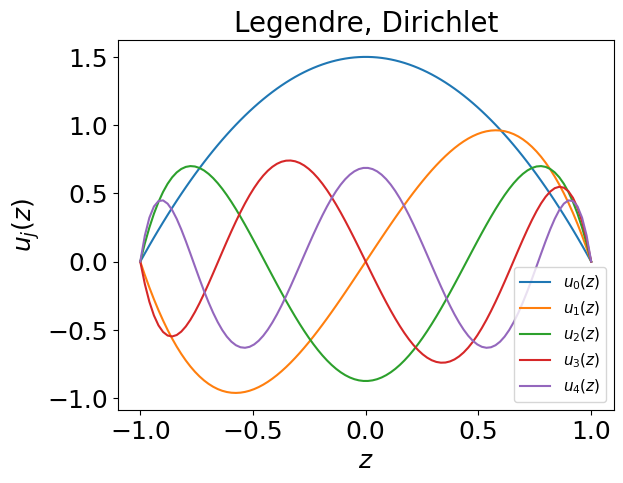

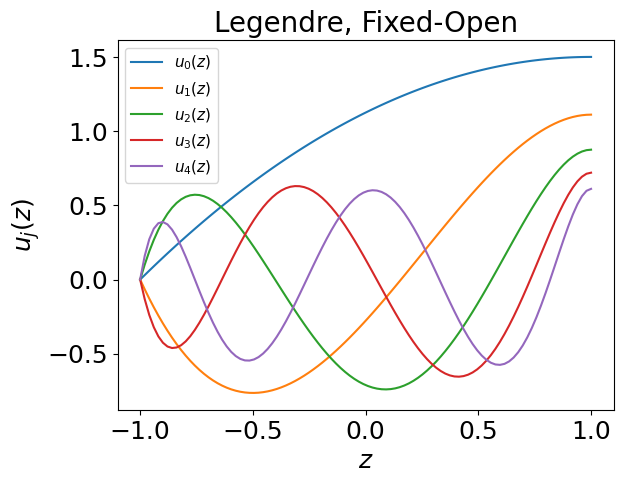

In [50]:
from scipy.special import legendre

x = np.linspace(-1,1,100)
# dirichlet
u = lambda x,n: (legendre(n) - legendre(n+2))(x)
fig, ax = plt.subplots()
for k in range(5):
    ax.plot(x,u(x,k), label=f"$u_{k}(z)$")
ax.set_xlabel("$z$")
ax.set_ylabel("$u_j(z)$")
ax.legend(fontsize=11)
ax.set_title("Legendre, Dirichlet")

# fixed-open
u = lambda x,n: (legendre(n) + (2*n+3)/(n+2)**2*legendre(n+1) - (n+1)**2/(n+2)**2*legendre(n+2))(x)
fig, ax = plt.subplots()
for k in range(5):
    ax.plot(x,u(x,k), label=f"$u_{k}(z)$")
ax.set_xlabel("$z$")
ax.set_ylabel("$u_j(z)$")
ax.legend(fontsize=11)
ax.set_title("Legendre, Fixed-Open")

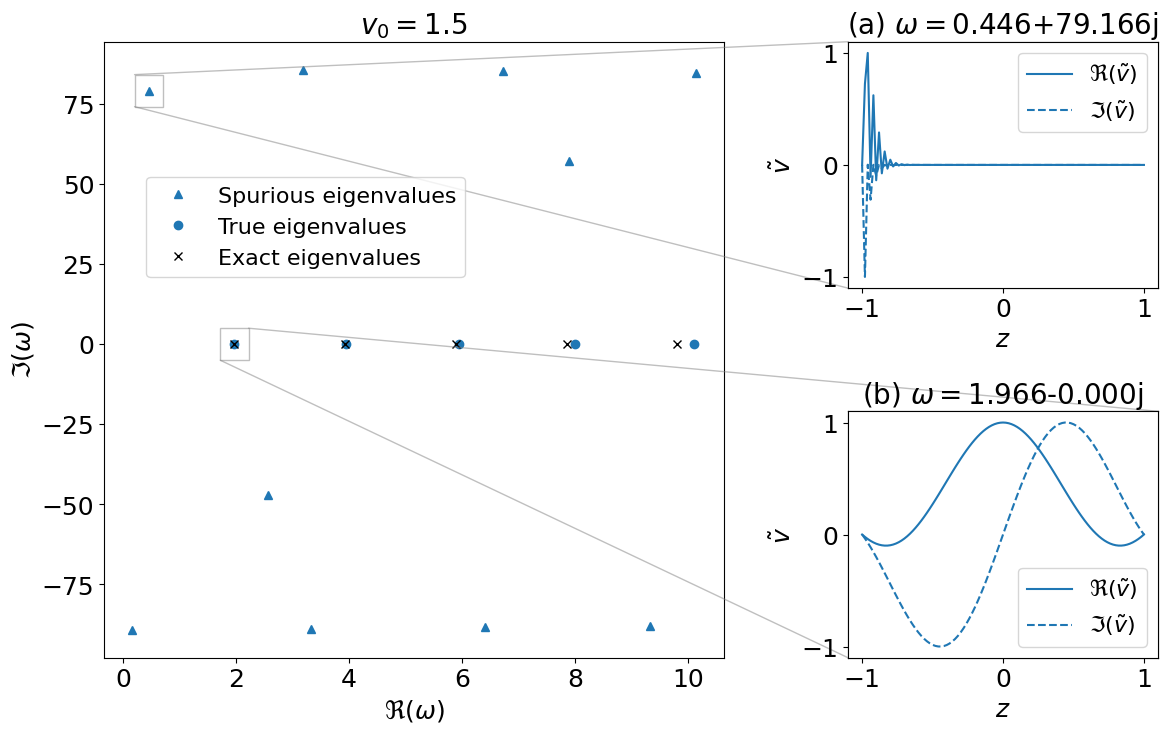

In [129]:
# good bad eigenmodes
fig, ax = plt.subplots(figsize=(8,8))
data = np.load("data/FD_constant_supersonic_fixed_fixed_N=101.npz")
omega = data["omega"]
V = data["V"]
x = data["x"]
is_in_range = (omega.real>0) & (omega.real < 11)
is_fake = (np.abs(omega.imag) > 1)
omega_fake = omega[is_in_range & is_fake]
omega_true = omega[is_in_range & ~is_fake]
V_fake = V[:,is_in_range & is_fake]
V_true = V[:,is_in_range & ~is_fake]
ax.plot(omega_fake.real, omega_fake.imag, "^", color="C0", label="Spurious eigenvalues")
ax.plot(omega_true.real, omega_true.imag, "o", color="C0", label="True eigenvalues")
omega_exact = -np.pi*np.arange(1,6)*(1-1.5**2)/2
ax.plot(omega_exact.real, omega_exact.imag, "x", color="black", label="Exact eigenvalues")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
ax.set_title("$v_0 = 1.5$")
ax.legend(bbox_to_anchor=(0.6, 0.6))

i = 1 
axins_bad_eigvec = ax.inset_axes((1.2,0.6,0.5,0.4))
ax_bad_eigvec = fig.add_axes([0,0,1,1])
line = ax_bad_eigvec.plot(x, V_fake[:,i].real/np.abs(V_fake[:,i].real).max(), label=f"$\\omega=${omega_fake[i]:.3f}", color="C0")
ax_bad_eigvec.plot(x, V_fake[:,i].imag/np.abs(V_fake[:,i].imag).max(), '--', color=line[-1].get_color())
ax_bad_eigvec.set_xlabel("$z$")
ax_bad_eigvec.set_ylabel("$\\tilde{v}$")
ax_bad_eigvec.legend(["$\\Re(\\tilde{v})$", "$\\Im(\\tilde{v})$"])
# ax_bad_eigvec.text(1,-1, f"$\\omega=${omega_fake[i]:.3f}", ha="right",va="bottom", fontdict={"fontsize": 16})
ax_bad_eigvec.set_title(f"(a) $\\omega=${omega_fake[i]:.3f}")
axins_bad_eigvec.set_xlim(omega_fake[i].real-0.25,omega_fake[i].real+0.25)
axins_bad_eigvec.set_ylim(omega_fake[i].imag-5,omega_fake[i].imag+5)
axins_bad_eigvec.set_xticks([])
axins_bad_eigvec.set_yticks([])
ip = axins_bad_eigvec.get_axes_locator()
ax_bad_eigvec.set_axes_locator(ip)
ax.indicate_inset_zoom(axins_bad_eigvec);

i = 0
axins_good_eigvec = ax.inset_axes((1.2,0.0,0.5,0.4))
ax_good_eigvec = fig.add_axes([0,0,1,1])
line = ax_good_eigvec.plot(x, V_true[:,i].real/np.abs(V_true[:,i].real).max(), label=f"$\\omega=${omega_true[i]:.3f}", color="C0")
ax_good_eigvec.plot(x, V_true[:,i].imag/np.abs(V_true[:,i].imag).max(), '--', color=line[-1].get_color())
ax_good_eigvec.set_xlabel("$z$")
ax_good_eigvec.set_ylabel("$\\tilde{v}$")
ax_good_eigvec.legend(["$\\Re(\\tilde{v})$", "$\\Im(\\tilde{v})$"])
# ax_good_eigvec.text(1,-1, f"$\\omega=${omega_true[i]:.3f}", ha="right",va="bottom", fontdict={"fontsize": 16})
ax_good_eigvec.set_title(f"(b) $\\omega=${omega_true[i]:.3f}")
axins_good_eigvec.set_xlim(omega_true[i].real-0.25,omega_true[i].real+0.25)
axins_good_eigvec.set_ylim(omega_true[i].imag-5,omega_true[i].imag+5)
axins_good_eigvec.set_xticks([])
axins_good_eigvec.set_yticks([])
ip = axins_good_eigvec.get_axes_locator()
ax_good_eigvec.set_axes_locator(ip)
ax.indicate_inset_zoom(axins_good_eigvec);

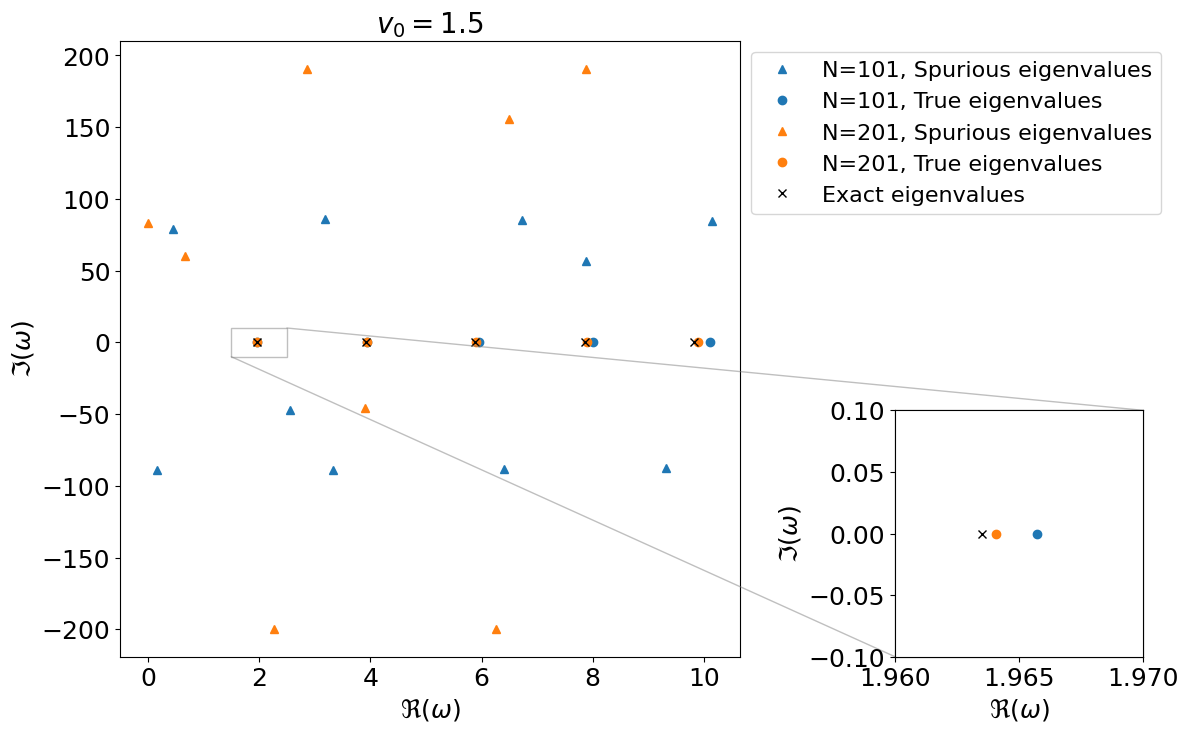

In [132]:
# plot eigenvalues
fig, ax = plt.subplots(figsize=(8,8))
axins_convergence = ax.inset_axes((1.25,0,0.4,0.4))
ax_convergence = fig.add_axes([0,0,1,1])
for N in [101, 201]:
    data = np.load(f"data/FD_constant_supersonic_fixed_fixed_N={N}.npz")
    omega = data["omega"]
    is_in_range = (omega.real>0) & (omega.real < 11)
    is_fake = (np.abs(omega.imag) > 1)
    omega_fake = omega[is_in_range & is_fake]
    omega_true = omega[is_in_range & ~is_fake]
    line, = ax.plot(omega_fake.real, omega_fake.imag, "^", label=f"N={N}, Spurious eigenvalues")
    ax.plot(omega_true.real, omega_true.imag, "o", color=line.get_color(), label=f"N={N}, True eigenvalues")
    ax_convergence.plot(omega_true.real, omega_true.imag, "o")
omega_exact = -np.pi*np.arange(1,6)*(1-1.5**2)/2
ax.plot(omega_exact.real, omega_exact.imag, "kx", label=f"Exact eigenvalues")
ax_convergence.plot(omega_exact.real, omega_exact.imag, "kx")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
ax.set_title("$v_0 = 1.5$")
ax.legend(bbox_to_anchor=(1, 1))



# convergence
ax_convergence.set_xlabel("$\\Re(\\omega)$")
ax_convergence.set_ylabel("$\\Im(\\omega)$")
ax_convergence.set_xlim(1.96,1.97)
ax_convergence.set_ylim(-0.1,0.1)
axins_convergence.set_xlim(1.5,2.5)
axins_convergence.set_ylim(-10,10)
axins_convergence.set_xticks([])
axins_convergence.set_yticks([])
ip = axins_convergence.get_axes_locator()
ax_convergence.set_axes_locator(ip)
ax.indicate_inset_zoom(axins_convergence);

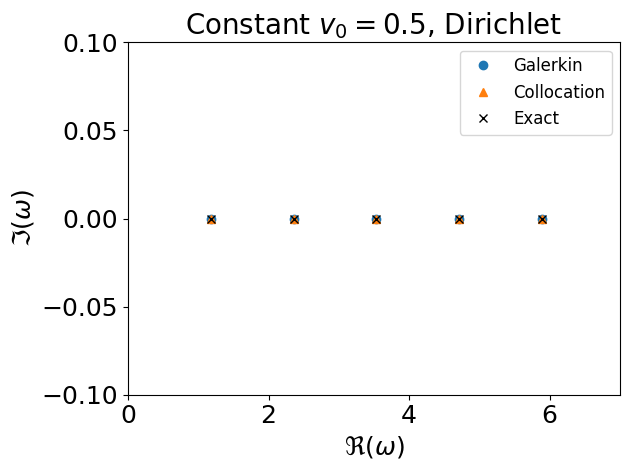

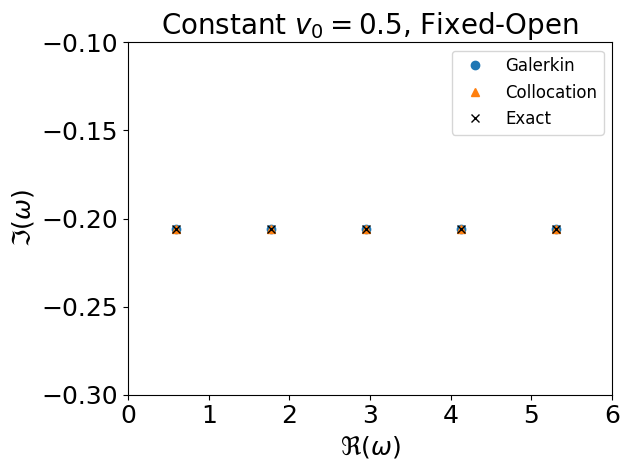

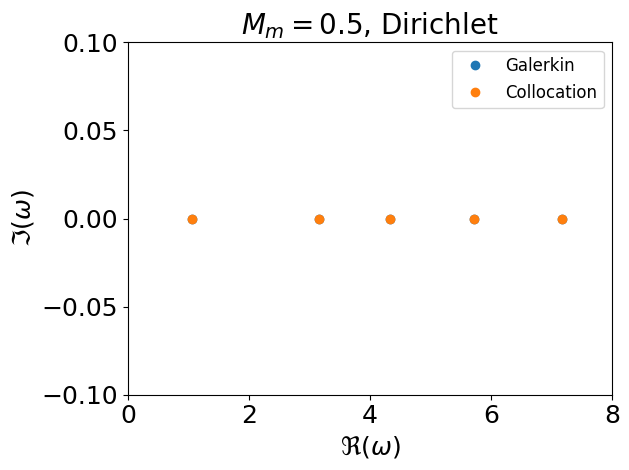

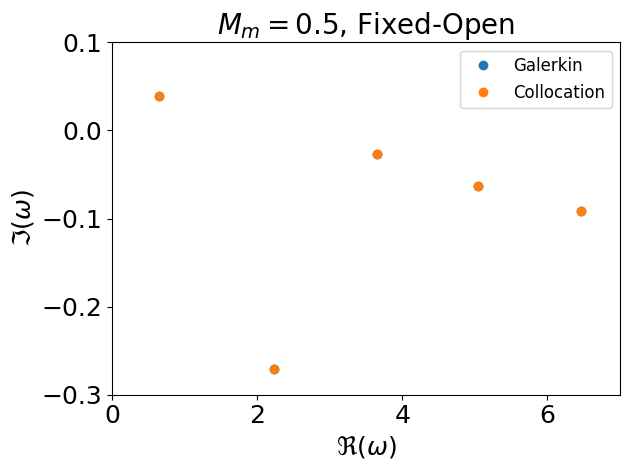

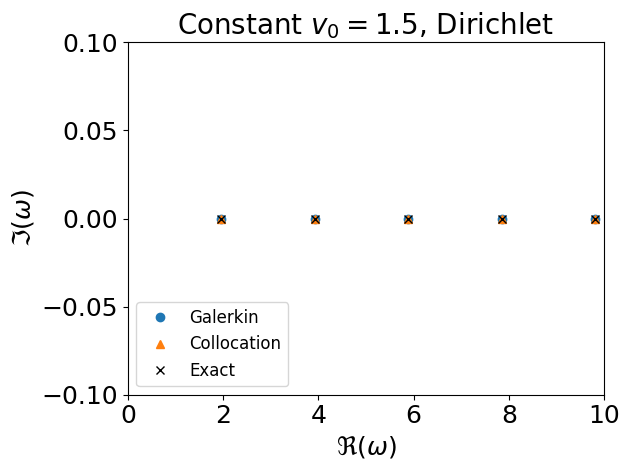

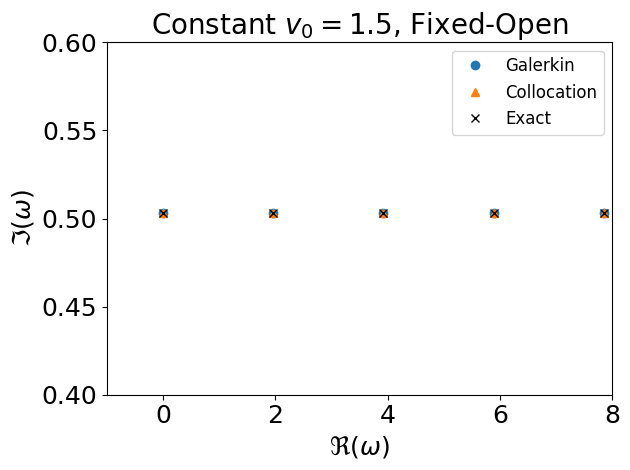

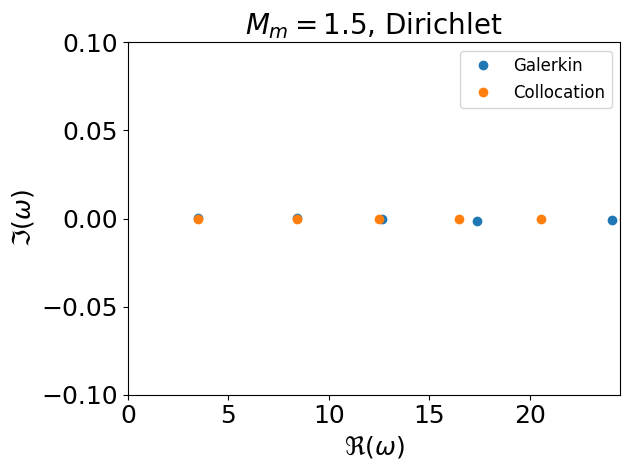

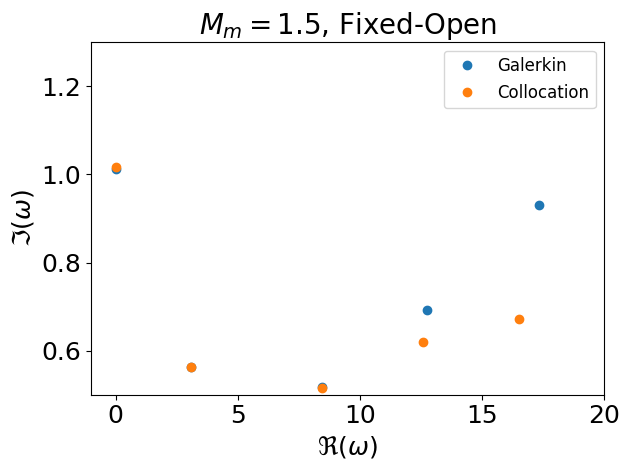

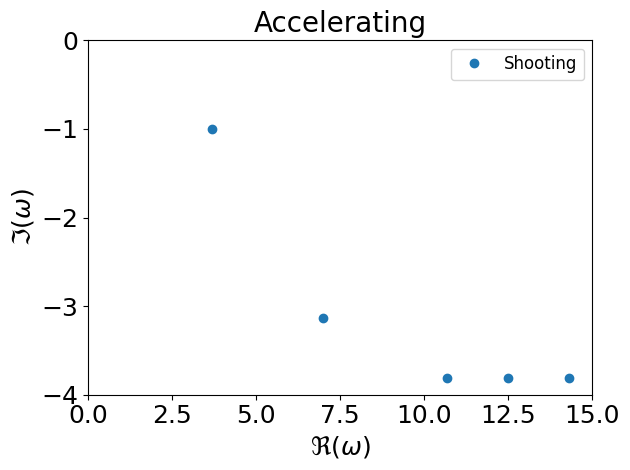

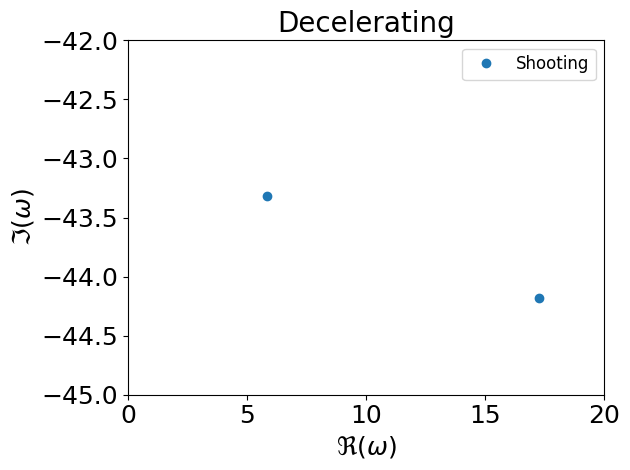

In [22]:
# experiments 
fig, ax = plt.subplots()
data_g = np.load("data/galerkin_constant_subsonic_fixed_fixed.npz")
data_c = np.load("data/collocation_constant_subsonic_fixed_fixed.npz")
omega_exact = np.pi*np.arange(1,6)*(1-0.5**2)/2
ax.plot(data_g["omega"].real, data_g["omega"].imag, "o", label="Galerkin")
ax.plot(data_c["omega"].real, data_c["omega"].imag, "^", label="Collocation")
ax.plot(omega_exact.real, omega_exact.imag, "kx", label="Exact")
ax.set_xlim(0,7)
ax.set_ylim(-0.1,0.1)
ax.legend(fontsize=12)
ax.set_title("Constant $v_0=0.5$, Dirichlet")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.tight_layout()
fig.savefig("data/constant-subsonic-dirichlet.png")

fig, ax = plt.subplots()
data_g = np.load("data/galerkin_constant_subsonic_fixed_open.npz")
data_c = np.load("data/collocation_constant_subsonic_fixed_open.npz")
omega_exact = (0.5**2-1)*(np.arange(5)*np.pi/2 - 1j*np.log(-0.5/1.5+0j)/4)
omega_exact.real = -omega_exact.real
ax.plot(data_g["omega"].real, data_g["omega"].imag, "o", label="Galerkin")
ax.plot(data_c["omega"].real, data_c["omega"].imag, "^", label="Collocation")
ax.plot(omega_exact.real, omega_exact.imag, "kx", label="Exact")
ax.set_xlim(0,6)
ax.set_ylim(-0.3, -0.1)
ax.legend(fontsize=12)
ax.set_title("Constant $v_0=0.5$, Fixed-Open")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.savefig("data/constant-subsonic-fixed-open.png")

# subsonic
fig, ax = plt.subplots()
data_g = np.load("data/galerkin_subsonic_fixed_fixed.npz")
data_c = np.load("data/collocation_subsonic_fixed_fixed.npz")
ax.plot(data_g["omega"].real, data_g["omega"].imag, "o", label="Galerkin")
ax.plot(data_c["omega"].real, data_c["omega"].imag, "o", label="Collocation")
ax.set_xlim(0,8)
ax.set_ylim(-0.1, 0.1)
ax.legend(fontsize=12)
ax.set_title("$M_m=0.5$, Dirichlet")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.savefig("data/subsonic-drichlet.png")

fig, ax = plt.subplots()
data_g = np.load("data/galerkin_subsonic_fixed_open.npz")
data_c = np.load("data/collocation_subsonic_fixed_open.npz")
ax.plot(data_g["omega"].real, data_g["omega"].imag, "o", label="Galerkin")
ax.plot(data_c["omega"].real, data_c["omega"].imag, "o", label="Collocation")
ax.set_xlim(0,7)
ax.set_ylim(-0.3, 0.1)
ax.legend(fontsize=12)
ax.set_title("$M_m=0.5$, Fixed-Open")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.savefig("data/subsonic-fixed-open.png")

# constant supersonic
fig, ax = plt.subplots()
data_g = np.load("data/galerkin_constant_supersonic_fixed_fixed.npz")
data_c = np.load("data/collocation_constant_supersonic_fixed_fixed.npz")
omega_exact = -np.pi*np.arange(1,6)*(1-1.5**2)/2
ax.plot(data_g["omega"].real, data_g["omega"].imag, "o", label="Galerkin")
ax.plot(data_c["omega"].real, data_c["omega"].imag, "^", label="Collocation")
ax.plot(omega_exact.real, omega_exact.imag, "kx", label="Exact")
ax.set_xlim(0,10)
ax.set_ylim(-0.1,0.1)
ax.legend(fontsize=12)
ax.set_title("Constant $v_0=1.5$, Dirichlet")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.savefig("data/constant-supersonic-dirichlet.png")

fig, ax = plt.subplots()
data_g = np.load("data/galerkin_constant_supersonic_fixed_open.npz")
data_c = np.load("data/collocation_constant_supersonic_fixed_open.npz")
omega_exact = (1.5**2-1)*(np.arange(5)*np.pi/2 - 1j*np.log(0.5/2.5+0j)/4)
ax.plot(data_g["omega"].real, data_g["omega"].imag, "o", label="Galerkin")
ax.plot(data_c["omega"].real, data_c["omega"].imag, "^", label="Collocation")
ax.plot(omega_exact.real, omega_exact.imag, "kx", label="Exact")
ax.set_xlim(-1,8)
ax.set_ylim(0.4, 0.6)
ax.legend(fontsize=12)
ax.set_title("Constant $v_0=1.5$, Fixed-Open")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.savefig("data/constant-supersonic-fixed-open.png")

# supersonic
fig, ax = plt.subplots()
data_g = np.load("data/galerkin_supersonic_fixed_fixed.npz")
data_c = np.load("data/collocation_supersonic_fixed_fixed.npz")
ax.plot(data_g["omega"].real, data_g["omega"].imag, "o", label="Galerkin")
ax.plot(data_c["omega"].real, data_c["omega"].imag, "o", label="Collocation")
ax.set_xlim(0,24.5)
ax.set_ylim(-0.1,0.1)
ax.legend(fontsize=12)
ax.set_title("$M_m=1.5$, Dirichlet")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.savefig("data/supersonic-drichlet.png")

fig, ax = plt.subplots()
data_g = np.load("data/galerkin_supersonic_fixed_open.npz")
data_c = np.load("data/collocation_supersonic_fixed_open.npz")
ax.plot(data_g["omega"].real, data_g["omega"].imag, "o", label="Galerkin")
ax.plot(data_c["omega"].real, data_c["omega"].imag, "o", label="Collocation")
ax.set_xlim(-1,20)
ax.set_ylim(0.5, 1.3)
ax.legend(fontsize=12)
ax.set_title("$M_m=1.5$, Fixed-Open")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.savefig("data/supersonic-fixed-open.png")

# accelerating
fig, ax = plt.subplots()
data_a = np.load("data/shooting_accelerating.npz")
ax.plot(data_a["omega"].real, data_a["omega"].imag, "o", label="Shooting")
ax.set_xlim(0,15)
ax.set_ylim(-4, 0)
ax.legend(fontsize=12)
ax.set_title("Accelerating")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$")
fig.tight_layout()
fig.savefig("data/accelerating.png")

# decelerating
fig, ax = plt.subplots()
data_a = np.load("data/shooting_decelerating.npz")
ax.plot(data_a["omega"].real, data_a["omega"].imag, "o", label="Shooting")
ax.set_xlim(0,20)
ax.set_ylim(-45, -42)
ax.legend(fontsize=12)
ax.set_title("Decelerating")
ax.set_xlabel("$\\Re(\\omega)$")
ax.set_ylabel("$\\Im(\\omega)$");
fig.tight_layout()
fig.savefig("data/decelerating.png")

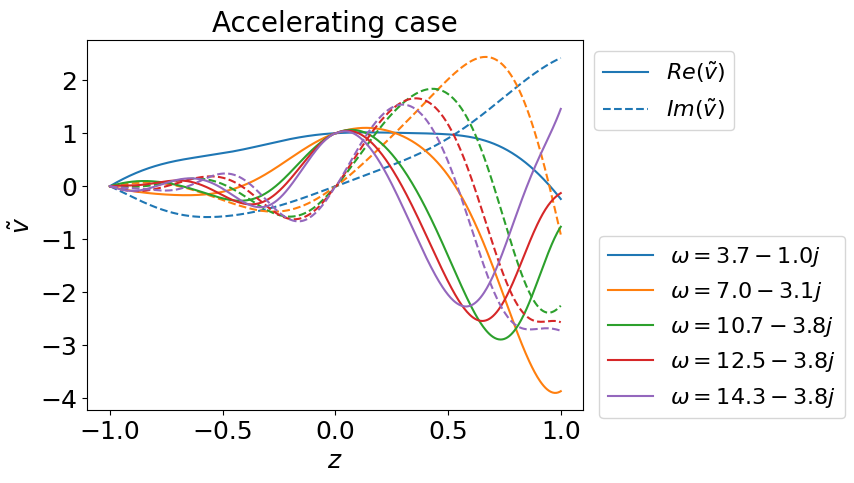

In [21]:
# accelerating
fig, ax = plt.subplots()
data_a = np.load("data/shooting_accelerating.npz")
omega = data_a["omega"]
V = data_a["V"]
x = data_a["x"]
for i in range(5):
    line, = ax.plot(x, V[:,i].real, label=f"$\omega={omega[i]:.1f}$")
    ax.plot(x, V[:,i].imag, "--", color=line.get_color())
ax.set_title("Accelerating case")
ax.set_xlabel("$z$")
ax.set_ylabel("$\\tilde{v}$")
legend = plt.legend(["$Re(\\tilde{v})$", "$Im(\\tilde{v})$"], bbox_to_anchor=(1,1))
plt.legend(bbox_to_anchor=(1.55,0.5))
fig.add_artist(legend)

In [93]:
data_c = np.load("data/collocation_constant_subsonic_fixed_fixed.npz")
data_g = np.load("data/galerkin_constant_subsonic_fixed_fixed.npz")
omega_exact = np.pi*np.arange(1,6)*(1-0.5**2)/2
omega_c = data_c["omega"][:5]
omega_g = data_g["omega"][:5]
print(np.abs(omega_exact - omega_c)/np.abs(omega_exact))
print(np.abs(omega_exact - omega_g)/np.abs(omega_exact))

[3.48944421e-14 6.72512513e-14 1.59603736e-14 9.81718764e-15
 4.07098462e-15]
[4.09596742e-14 1.65697986e-14 4.97650778e-14 3.27344763e-13
 4.11444935e-12]


In [98]:
data_c = np.load("data/collocation_constant_supersonic_fixed_fixed.npz")
data_g = np.load("data/galerkin_constant_supersonic_fixed_fixed.npz")
omega_exact = -np.pi*np.arange(1,6)*(1-1.5**2)/2
omega_c = data_c["omega"]
omega_g = data_g["omega"]
omega_c = omega_c[np.abs(omega_c.imag) < 0.1][:5]
omega_g = omega_g[np.abs(omega_g.imag) < 0.1][:5]
print(np.abs(omega_exact - omega_c)/np.abs(omega_exact))
print(np.abs(omega_exact - omega_g)/np.abs(omega_exact))

[2.08984845e-13 9.29501612e-14 4.24537846e-14 3.38103217e-14
 1.74476052e-14]
[1.64805562e-13 6.09485884e-14 6.81795167e-12 1.95656738e-09
 1.54134402e-07]


In [3]:
data_c = np.load("data/collocation_constant_subsonic_fixed_open.npz")
data_g = np.load("data/galerkin_constant_subsonic_fixed_open.npz")
omega_exact = (0.5**2-1)*(np.arange(5)*np.pi/2 - 1j*np.log(-0.5/1.5+0j)/4)
omega_exact.real = -omega_exact.real
omega_c = data_c["omega"]
omega_g = data_g["omega"]
omega_c = omega_c[np.abs(omega_c.imag+0.2) < 0.1][:5]
omega_g = omega_g[np.abs(omega_g.imag+0.2) < 0.1][:5]
print(np.abs(omega_exact - omega_c)/np.abs(omega_exact))
print(np.abs(omega_exact - omega_g)/np.abs(omega_exact))

[2.36006260e-12 1.95269435e-13 6.78183927e-14 2.43078107e-14
 4.17011610e-14]
[2.52491323e-12 2.19414097e-13 1.82417919e-13 5.92948284e-13
 4.41481039e-12]


In [4]:
data_g = np.load("data/galerkin_constant_supersonic_fixed_open.npz")
data_c = np.load("data/collocation_constant_supersonic_fixed_open.npz")
omega_exact = (1.5**2-1)*(np.arange(5)*np.pi/2 - 1j*np.log(0.5/2.5+0j)/4)
omega_c = data_c["omega"]
omega_g = data_g["omega"]
omega_c = omega_c[np.abs(omega_c.imag-0.5) < 0.1][:5]
omega_g = omega_g[np.abs(omega_g.imag-0.5) < 0.1][:5]
print(np.abs(omega_exact - omega_c)/np.abs(omega_exact))
print(np.abs(omega_exact - omega_g)/np.abs(omega_exact))

[5.10516649e-11 3.58709292e-12 8.72529437e-13 3.24263319e-13
 1.34297439e-13]
[5.38682371e-11 4.31902441e-12 1.44799870e-12 8.02395621e-11
 2.05280524e-09]


In [ ]:
from scipy.special import lambertw
W = lambda x, k: np.real(lambertw(x, k=k))  # I only need the real parts
x1 = np.linspace(-1/np.e, 5, 1000)
y1 = W(x1,0)
y1[0] = -1
x2 = np.linspace(-1/np.e, -0.1, 1000)
y2 = W(x2,-1)
y2[0] = -1
plt.plot(x1,y1,label="$W_0$")
plt.plot(x2,y2,label="$W_{-1}$")
plt.xlabel("$x$")
plt.ylabel("$W(x)$")
plt.legend()
plt.tight_layout()
plt.savefig("lambert-w.png")